<a href="https://colab.research.google.com/github/minche0l/Age_Friendly_City/blob/main/231109_Basecode_LeNet5_MINIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 패키지 선언

In [1]:
import torch
import torch.nn as nn
import torchvision.datasets as dataset
import torchvision.transforms as transform
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

## Dataset 다운로드

In [2]:
# Training dataset 다운로드
mnist_train = dataset.MNIST(root = "./",
                            train = True,
                            transform = transform.ToTensor(),
                            download = True)
# Testing dataset 다운로드
mnist_test = dataset.MNIST(root = "./",
                            train = False,
                            transform = transform.ToTensor(),
                            download = True)

100%|██████████| 9912422/9912422 [00:00<00:00, 234636503.03it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 123860627.63it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 24495338.50it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3578908.28it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



## LeNet5 모델 정의
- Fully Connected Layer -> nn.Linear(in_features, out_features)
- Convolutional Layer -> nn.Conv2d(in_channels, out_channels, kernel_size, stride, padding)
- ReLU -> nn.ReLU()
- Max Pooling -> nn.MaxPool2d(kernel_size, stride)


In [3]:
class LeNet5(nn.Module):

  def __init__(self):
    super(LeNet5, self).__init__()
    # 신경망 파라미터 초기화 (Conv 2개, FC 3개, ReLU, MaxPool)
    self.conv1 =  nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1, padding=0)
    self.relu = nn.ReLU()
    self.max_pool = nn.MaxPool2d(kernel_size=2, stride=2)
    self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0)
    self.fc1 = nn.Linear(in_features=256, out_features=120)
    self.fc2 = nn.Linear(in_features=120, out_features=84)
    self.fc3 = nn.Linear(in_features=84, out_features=10)

  def forward(self, x):
    #-----------------------------------------------------------------
    # Convolution, MaxPool layer 추가 필요 (발표 자료 중 1~6번)
    y = self.conv1(x)
    y = self.relu(y)
    y = self.max_pool(y)

    y = self.conv2(y)
    y = self.relu(y)
    y = self.max_pool(y)


    #-----------------------------------------------------------------

    y = y.view(-1, 256) # feature map 평탄화

    #-----------------------------------------------------------------
    # Fully Connected layer 추가 필요 (발표 자료 중 8~12번)
    y = self.fc1(y)
    y = self.relu(y)

    y = self.fc2(y)
    y = self.relu(y)

    y = self.fc3(y)
    #-----------------------------------------------------------------

    return y


## Hyper-parameters 지정

In [4]:
batch_size = 100
learning_rate = 0.1
training_epochs = 15
loss_function = nn.CrossEntropyLoss()
network = LeNet5().to('cuda')
optimizer = torch.optim.SGD(network.parameters(), lr = learning_rate)

data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

## CNN 학습을 위한 반복문 선언

In [5]:
network.train()

for epoch in range(training_epochs):
  avg_cost = 0
  total_batch = len(data_loader)

  for img, label in data_loader:
    img = img.to('cuda')
    label = label.to('cuda')
    pred = network(img)

    loss = loss_function(pred, label)
    optimizer.zero_grad() # gradient 초기화
    loss.backward()
    optimizer.step()

    avg_cost += loss / total_batch

  print('Epoch: %d Loss = %f'%(epoch+1, avg_cost))

print('Learning finished')

Epoch: 1 Loss = 0.659629
Epoch: 2 Loss = 0.100411
Epoch: 3 Loss = 0.070915
Epoch: 4 Loss = 0.056105
Epoch: 5 Loss = 0.045880
Epoch: 6 Loss = 0.039114
Epoch: 7 Loss = 0.035008
Epoch: 8 Loss = 0.029744
Epoch: 9 Loss = 0.026020
Epoch: 10 Loss = 0.024054
Epoch: 11 Loss = 0.021485
Epoch: 12 Loss = 0.018916
Epoch: 13 Loss = 0.016529
Epoch: 14 Loss = 0.015423
Epoch: 15 Loss = 0.014551
Learning finished


## 학습이 완료된 모델을 이용해 정답률 확인

In [6]:
network.eval()
network = network.to('cpu')
img_test = mnist_test.data.float().unsqueeze(1)
label_test = mnist_test.targets

with torch.no_grad(): # test에서는 기울기 계산 제외
  prediction = network(img_test) # 전체 test data를 한번에 계산

  correct_prediction = torch.argmax(prediction, 1) == label_test
  accuracy = correct_prediction.float().mean()
  print('Accuracy:', accuracy.item())

Accuracy: 0.9890999794006348


## 예측 결과 확인

tensor([[-1012.2308,  -443.4158, -1213.5693,  1281.1866,   404.4855, -1102.1002,
         -2099.0281,  3043.3093,    27.9489,  1040.5209]])
tensor([7])


<function matplotlib.pyplot.show(close=None, block=None)>

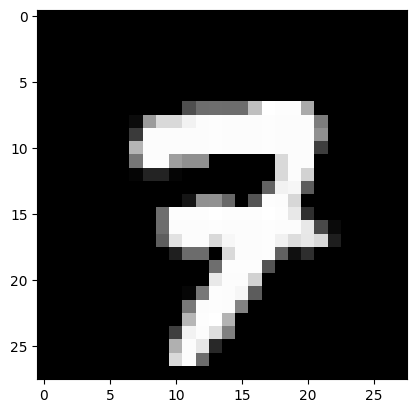

In [7]:
first_data = mnist_test.data[1543]

with torch.no_grad():
  prediction = network(first_data.float().unsqueeze(0))

prediction_num = torch.argmax(prediction, 1)

print(prediction)
print(prediction_num)
plt.imshow(first_data, cmap="gray")
plt.show